In [270]:
import os
# os.chdir("1_feature_engineering")
exec(open("extract_review_features.py").read())

In [271]:
feature_matrix = produce_feature_matrix(data2)

In [272]:
feature_matrix.shape

(1050, 388)

In [273]:
feature_matrix.head()

,text_formatted,sen_len,sen_avg_len,sen_med_len,NOUN,VERB,ADJ,ADV,.,ADP,...,come,servic,love,one,like,restaur,food,realli,go,get
0,In my dream world this amazing incredible plac...,59,5.900000,5.0,4,3,3,0,0,0,...,-0.469459,-0.436863,0.379129,-0.412511,-0.437258,-0.631999,-0.526480,-0.458189,-0.327366,1.169992
1,Pretty good ramen. It honestly wasn't quite a...,97,4.850000,4.5,6,4,3,6,1,0,...,-0.469459,-0.436863,-0.685271,-0.412511,-0.437258,-0.631999,0.715776,-0.458189,-0.327366,-0.437981
2,First time there chicken for both me and my wi...,468,5.032258,5.0,35,25,16,8,2,2,...,-0.469459,1.439237,-0.685271,-0.412511,-0.437258,0.876180,1.958032,1.145472,1.186884,-0.437981
3,The staff is friendly and service is done quic...,94,5.222222,5.0,8,3,2,1,0,4,...,-0.469459,-0.436863,0.379129,-0.412511,-0.437258,0.876180,-0.526480,-0.458189,-0.327366,-0.437981
4,I originally gave Main Ingredient two stars ba...,854,5.239264,5.0,66,22,37,13,2,5,...,3.792200,-0.436863,0.379129,4.528211,1.282296,-0.631999,0.715776,-0.458189,-0.327366,-0.437981


In [193]:
target = data[["food", "service", "price", "ambiance"]]

In [194]:
target.shape

(1050, 4)

In [195]:
target.head()

,food,service,price,ambiance
0,1,0,0,0
1,1,0,0,0
2,1,1,0,1
3,0,1,0,1
4,1,0,0,1


## Data processing for models

In [18]:
exec(open("iterative_stratification.py").read())

In [23]:
X_tmp, y_tmp, X_test, y_test = iterative_train_test_split(
    np.array(feature_matrix[feature_matrix.columns[1:]]),
    np.array(target),
    test_size=0.4,
    random_state=10191994)

In [24]:
X_train, y_train, X_validation, y_validation = iterative_train_test_split(
    X_tmp,
    y_tmp,
    test_size=0.2,
    random_state=10191994)

In [26]:
y_train

array([[1, 0, 0, 0],
       [1, 1, 0, 1],
       [1, 1, 1, 0],
       ...,
       [1, 1, 1, 0],
       [1, 1, 1, 1],
       [1, 0, 1, 0]])

## Try modeling just for one category for now

In [63]:
feature_matrix.columns[1:4]

Index(['sen_len', 'sen_avg_len', 'sen_med_len'], dtype='object')

In [68]:
feature_matrix.columns[4:148]

Index(['VERB', 'ADJ', 'ADV', '.', 'ADP', 'NUM', 'PRON', 'PRT', 'DET', 'CONJ',
       ...
       'X_VERB', 'X_ADJ', 'X_ADV', 'X_.', 'X_ADP', 'X_NUM', 'X_PRON', 'X_PRT',
       'X_DET', 'X_CONJ'],
      dtype='object', length=143)

In [70]:
feature_matrix.columns[148:152]

Index(['food_avg_sim', 'service_avg_sim', 'price_avg_sim', 'ambiance_avg_sim'], dtype='object')

In [72]:
feature_matrix.columns[153:252]

Index(['alway', 'amaz', 'ask', 'back', 'bad', 'bar', 'best', 'better',
       'burger', 'came', 'chees', 'chicken', 'come', 'could', 'day', 'definit',
       'delici', 'dinner', 'dish', 'drink', 'eat', 'enjoy', 'even', 'ever',
       'everyth', 'experi', 'first', 'flavor', 'food', 'fresh', 'fri',
       'friend', 'friendli', 'get', 'give', 'go', 'good', 'got', 'great',
       'know', 'like', 'littl', 'locat', 'look', 'lot', 'love', 'lunch',
       'made', 'make', 'meal', 'meat', 'menu', 'minut', 'much', 'need',
       'never', 'nice', 'one', 'order', 'peopl', 'pizza', 'place', 'pretti',
       'price', 're', 'realli', 'recommend', 'restaur', 'right', 'room',
       'said', 'salad', 'sandwich', 'sauc', 'say', 'seat', 'serv', 'server',
       'servic', 'staff', 'star', 'tabl', 'take', 'tast', 'thing', 'think',
       'time', 'took', 'top', 'tri', 'two', 'us', 've', 'wait', 'want', 'well',
       'went', 'work', 'would'],
      dtype='object')

In [109]:
feature_matrix.columns[253:353]

Index(['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6',
       'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12',
       'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18',
       'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24',
       'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30',
       'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36',
       'topic_37', 'topic_38', 'topic_39', 'topic_40', 'topic_41', 'topic_42',
       'topic_43', 'topic_44', 'topic_45', 'topic_46', 'topic_47', 'topic_48',
       'topic_49', 'topic_50', 'topic_51', 'topic_52', 'topic_53', 'topic_54',
       'topic_55', 'topic_56', 'topic_57', 'topic_58', 'topic_59', 'topic_60',
       'topic_61', 'topic_62', 'topic_63', 'topic_64', 'topic_65', 'topic_66',
       'topic_67', 'topic_68', 'topic_69', 'topic_70', 'topic_71', 'topic_72',
       'topic_73', 'topic_74', 'topic_75', 'topic_76', 'topic

In [85]:
X_tmp, y_tmp, X_test, y_test = iterative_train_test_split(
    np.array(feature_matrix[feature_matrix.columns[253:]]),
    np.array(target[["price"]]),
    test_size=0.4,
    random_state=10191994)

X_train, y_train, X_validation, y_validation = iterative_train_test_split(
    X_tmp,
    y_tmp,
    test_size=0.2,
    random_state=10191994)

In [196]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [130]:
classifier = RandomForestClassifier(n_estimators=500,
                                    max_depth=2,
                                    random_state=10191994)

In [88]:
scores = cross_val_score(classifier, X_train, y_train, cv=3)

/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [89]:
scores

array([0.67455621, 0.73809524, 0.73652695])

In [84]:
target[["food", "service", "price", "ambiance"]].describe()

,food,service,price,ambiance
count,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.908571,0.637143,0.263810,0.404762
std,0.288355,0.481053,0.440907,0.491080
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [197]:
def check_accuracy(start_index, end_index, target_string):
    X_tmp, y_tmp, X_test, y_test = iterative_train_test_split(
        np.array(feature_matrix[feature_matrix.columns[start_index:end_index]]),
        np.array(target[[target_string]]),
        test_size=0.4,
        random_state=10191994)

    X_train, y_train, X_validation, y_validation = iterative_train_test_split(
        X_tmp,
        y_tmp,
        test_size=0.2,
        random_state=10191994)

    clf1 = RandomForestClassifier(n_estimators=500,
                                  max_depth=3,
                                  max_features=0.7,
                                  random_state=10191994)
    clf2 = SVC(kernel="linear", C=0.025)
    clf3 = SVC(gamma=2, C=1)
    clf4 = GaussianNB()
    clf5 = AdaBoostClassifier()
    clf6 = KNeighborsClassifier()
    
#     scores = cross_val_score(classifier, X_train, y_train, cv=10)
    def cv_score(clf, cv):
        scores = cross_val_score(clf, X_train, y_train, cv=cv)
        return np.mean(scores)
        
        
    score1 = clf1.fit(X_train, y_train).score(X_validation, y_validation)
    score2 = clf2.fit(X_train, y_train).score(X_validation, y_validation)
    score3 = clf3.fit(X_train, y_train).score(X_validation, y_validation)
    score4 = clf4.fit(X_train, y_train).score(X_validation, y_validation)
    score5 = clf5.fit(X_train, y_train).score(X_validation, y_validation)
    score6 = clf6.fit(X_train, y_train).score(X_validation, y_validation)
    
    conf_matrix1 = confusion_matrix(y_validation,
            clf1.predict(X_validation))
#     score1 = cv_score(clf1, 3)
#     score2 = cv_score(clf2, 3)
#     score3 = cv_score(clf3, 3)
#     score4 = cv_score(clf4, 3)
#     score5 = cv_score(clf5, 3)
#     score6 = cv_score(clf6, 3)
    
    print("RF: {}".format(score1))
    print("LinearSVC: {}".format(score2))
    print("RBF_SVC: {}".format(score3))
    print("NB: {}".format(score4))
    print("Boost: {}".format(score5))
    print("KNN: {}".format(score6))
    
#     return [score1, score2, score3, score4, score5, score6]
    return conf_matrix1

In [198]:
import warnings

In [285]:
warnings.simplefilter("ignore")
# metadata
print(check_accuracy(1, 389, "food"))

RF: 0.9285714285714286
LinearSVC: 0.9523809523809523
RBF_SVC: 0.9047619047619048
NB: 0.8015873015873016
Boost: 0.8968253968253969
KNN: 0.9047619047619048
[[  6   6]
 [  3 111]]


In [154]:
warnings.simplefilter("ignore")
# syntax
print(check_accuracy(4, 148, "service"))

RF: 0.6666666666666666
LinearSVC: 0.6111111111111112
RBF_SVC: 0.6349206349206349
NB: 0.42857142857142855
Boost: 0.6031746031746031
KNN: 0.5873015873015873
[[ 8 38]
 [ 4 76]]


In [155]:
warnings.simplefilter("ignore")
# word embeddings
print(check_accuracy(148, 152, "service"))

RF: 0.6984126984126984
LinearSVC: 0.7222222222222222
RBF_SVC: 0.7222222222222222
NB: 0.6507936507936508
Boost: 0.7063492063492064
KNN: 0.7142857142857143
[[11 35]
 [ 3 77]]


In [156]:
warnings.simplefilter("ignore")
# tfidf
print(check_accuracy(153, 252, "service"))

RF: 0.8412698412698413
LinearSVC: 0.6349206349206349
RBF_SVC: 0.7222222222222222
NB: 0.7619047619047619
Boost: 0.7857142857142857
KNN: 0.6666666666666666
[[42  4]
 [16 64]]


In [157]:
warnings.simplefilter("ignore")
# topics
print(check_accuracy(253, 353, "service"))

RF: 0.6349206349206349
LinearSVC: 0.6349206349206349
RBF_SVC: 0.6190476190476191
NB: 0.5873015873015873
Boost: 0.6587301587301587
KNN: 0.6428571428571429
[[ 7 39]
 [ 7 73]]


## Take a look at word embeddings

In [159]:
from sklearn.decomposition import PCA

In [161]:
pca = PCA(n_components=2)

In [179]:
test = pd.DataFrame({"food": model["food"],
                     "tasty": model["tasty"],
                     "delicious": model["delicious"],
                     "yummy": model["yummy"],
                     "service": model["service"],
                     "fast": model["fast"],
                     "quick": model["quick"],
                     "line": model["line"],
                     "wait": model["wait"],
                     "seated": model["seated"],
                     "price": model["price"],
                     "expensive": model["expensive"],
                     "cost": model["cost"],
                     "worth": model["worth"],
                     "ambiance": model["ambiance"],
                     "atmosphere": model["atmosphere"],
                     "environment": model["environment"],
                     "patio": model["patio"],
                     "loud": model["loud"],
                     "smelly": model["smelly"]}).transpose()

In [180]:
test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
food,1.042259,-1.586686,1.129729,0.048465,-1.435804,-1.049850,4.081865,-0.361881,-0.100937,0.393703,...,1.284966,1.339641,-0.038914,2.937917,0.072245,0.622748,0.175963,1.313831,1.261186,-1.492236
tasty,-1.921600,-0.539663,-1.837533,-0.942954,0.587802,-0.196957,1.170233,2.452882,-0.062005,-1.354693,...,-0.425619,-0.100746,-1.086600,0.136232,0.459499,-0.614349,1.649420,-1.536968,1.247450,0.587571
delicious,-0.186783,-1.260830,-2.369293,-1.667711,1.158787,-0.173645,0.465218,3.083711,-0.153166,-2.629373,...,-0.907844,-1.107474,-1.636065,0.651473,0.639125,-0.071738,1.526666,-2.226679,0.846168,0.563186
yummy,-1.705839,-1.304598,-1.889440,-0.200148,1.343643,0.163232,0.629424,3.536555,-0.588717,-2.099670,...,-0.274160,-0.881606,-0.422338,-0.832505,0.171969,-1.079599,1.289176,-2.105651,0.900914,0.287926
service,2.578226,-4.813882,-1.657747,-2.410490,-0.124744,0.683935,2.567658,-1.013041,-0.411402,0.982446,...,0.757038,-0.445202,-0.807965,4.543818,2.220752,2.569940,0.102712,1.400676,-1.560252,-1.417525
fast,-0.142055,-1.841364,-0.425871,1.720034,-1.351958,1.047660,1.812585,0.115761,-1.092388,0.331042,...,-0.562916,-1.262002,-0.769476,3.377361,3.223457,2.768127,-0.076131,-1.117541,1.211626,0.431549
quick,-3.090757,-1.791096,0.191888,0.705351,0.988458,0.063281,2.423786,-0.929808,-0.739587,-0.751277,...,0.260539,-0.390355,-1.238551,3.018154,3.212846,0.804531,0.386183,-1.130485,0.816491,0.194129
line,3.391950,-1.007216,1.677304,2.639070,-0.807639,-2.201619,-3.145576,0.779057,-0.183029,-1.206870,...,-2.323799,-0.361888,-0.563851,2.049847,1.852859,-1.819145,-4.438269,0.975498,-0.966074,1.250243
wait,2.138423,-0.841400,2.279950,-0.440776,-0.501957,-1.411518,-2.591392,-0.078826,1.531753,-1.784008,...,-2.688216,0.536205,1.367532,1.999355,0.277657,0.494694,-1.745569,-0.137013,-2.524632,-3.488332
seated,1.646240,-2.174074,0.096740,-0.969134,-1.310849,-0.593314,-1.076849,0.640808,0.721532,1.617823,...,-0.462056,-0.991852,-2.862642,1.699741,2.498084,-0.426943,-2.847460,0.759626,-3.418220,-0.256876


In [182]:
result = pca.fit_transform(test)

In [183]:
import matplotlib.pyplot as plt

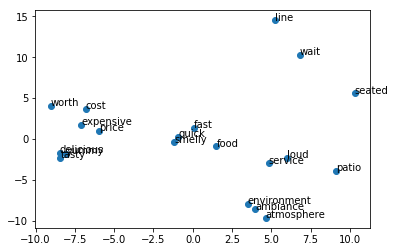

In [186]:
plt.scatter(result[:, 0], result[:, 1])
words = list(test.index)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

## Playing around with RF

In [277]:
X_tmp, y_tmp, X_test, y_test = iterative_train_test_split(
    np.array(feature_matrix[feature_matrix.columns]),
    np.array(target[["service"]]),
    test_size=0.4,
    random_state=10191994)

X_train, y_train, X_validation, y_validation = iterative_train_test_split(
    X_tmp,
    y_tmp,
    test_size=0.2,
    random_state=10191994)

clf1 = RandomForestClassifier(n_estimators=2000,
                              max_depth=3,
                              min_samples_leaf=10,
                              max_features=0.6,
                              random_state=10191994,
                              n_jobs=6)

clf1.fit(X_train[:,1:], y_train).score(X_validation[:,1:], y_validation)

# X_train[0:5]

0.8571428571428571

two paths:
1. look at incorrect tags -> feature engineering
2. try adding in pseudo-labels -> model

In [240]:
clf1.fit(X_train[:,1:], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features=0.6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=10191994,
                       verbose=0, warm_start=False)

In [241]:
predicted = clf1.predict(X_validation[:,1:])

In [257]:
check_df = pd.concat([pd.Series(X_validation[:,0]),
           pd.Series([x[0] for x in y_validation.tolist()]),
           pd.Series(predicted)], axis=1)

In [258]:
check_df.columns = ["review_text", "true", "pred"]

In [261]:
diff = check_df[check_df["true"]!=check_df["pred"]]

In [263]:
for index, row in diff.iterrows():
    print("true: {}, predicted: {}".format(row["true"], row["pred"]))
    print(row["review_text"])
    print("\n\n")
    

true: 1, predicted: 0
After a couple of years of my absence I returned to experience a magnificent culinary  explosion of flavors and colors!  Boy, had I been missing out.  We had an appetizer of fried calamari steak strips, cooked perfectly and enrobed in a delicate tempura breading, accompanied by a spicy red pepper sauce, lovely. Next I had Cioppino Dello Chef, an ample centerpiece of salmon surrounded by clams and mussels in their shells, large shrimp and delicate little rings of calamari, all atop a bed of linguini al dente, bathed in a spicy garlic red clam sauce, and my wife ordered Salmone Vesuvio, a thick pan sizzled king salmon in a lemon-white wine/saffron reduction with a touch of cream, accompanied by rice and vegetables, wow!  Our server, Morgan, who was as friendly and efficient as she was easy to look at, took wonderful care of us.  What a great evening and a great meal.  Just try and stop me from coming back for another five star meal.  Don't miss this opportunity to p

seems some errors in handlabeling as well
but maybe add some more word embeddings and a count vectorizer that is normalized

## Try pseudo-labeling

In [412]:
X_tmp, y_tmp, X_test, y_test = iterative_train_test_split(
    np.array(feature_matrix),
    np.array(target[["service"]]),
    test_size=0.4,
    random_state=10191994)

X_train, y_train, X_validation, y_validation = iterative_train_test_split(
    X_tmp,
    y_tmp,
    test_size=0.2,
    random_state=10191994)

In [413]:
feature_matrix.columns

Index(['text_formatted', 'sen_len', 'sen_avg_len', 'sen_med_len', 'NOUN',
       'VERB', 'ADJ', 'ADV', '.', 'ADP',
       ...
       'come', 'servic', 'love', 'one', 'like', 'restaur', 'food', 'realli',
       'go', 'get'],
      dtype='object', length=388)

In [414]:
pd.DataFrame(X_tmp)

,0,1,2,3,4,5,6,7,8,9,...,378,379,380,381,382,383,384,385,386,387
0,In my dream world this amazing incredible plac...,59,5.9,5,4,3,3,0,0,0,...,-0.469459,-0.436863,0.379129,-0.412511,-0.437258,-0.631999,-0.52648,-0.458189,-0.327366,1.16999
1,Pretty good ramen. It honestly wasn't quite a...,97,4.85,4.5,6,4,3,6,1,0,...,-0.469459,-0.436863,-0.685271,-0.412511,-0.437258,-0.631999,0.715776,-0.458189,-0.327366,-0.437981
2,The staff is friendly and service is done quic...,94,5.22222,5,8,3,2,1,0,4,...,-0.469459,-0.436863,0.379129,-0.412511,-0.437258,0.87618,-0.52648,-0.458189,-0.327366,-0.437981
3,I originally gave Main Ingredient two stars ba...,854,5.23926,5,66,22,37,13,2,5,...,3.7922,-0.436863,0.379129,4.52821,1.2823,-0.631999,0.715776,-0.458189,-0.327366,-0.437981
4,This was by far one of the best super bowl par...,429,4.66304,4,35,21,11,12,3,1,...,0.951094,-0.436863,-0.685271,-0.412511,-0.437258,-0.631999,-0.52648,-0.458189,-0.327366,-0.437981
5,I work nearby and have been going to Tavern Gr...,466,6.38356,6,22,15,21,10,1,0,...,-0.469459,-0.436863,0.379129,-0.412511,-0.437258,0.87618,-0.52648,1.14547,1.18688,-0.437981
6,I tried out the Rio due to some incredible roo...,1023,5.62088,5,81,40,35,18,0,7,...,-0.469459,-0.436863,0.379129,1.2344,-0.437258,-0.631999,0.715776,1.14547,-0.327366,1.16999
7,I would have given this a 5 if our perfect mea...,67,5.15385,5,2,4,3,2,0,1,...,-0.469459,-0.436863,-0.685271,-0.412511,-0.437258,-0.631999,-0.52648,-0.458189,-0.327366,1.16999
8,Been a customer for years! However the last ye...,355,5.22059,5,23,7,21,9,0,3,...,-0.469459,0.501187,0.379129,-0.412511,-0.437258,-0.631999,0.715776,-0.458189,-0.327366,-0.437981
9,Everything we tasted was amazing! From the Nia...,136,6.47619,6,10,5,4,2,0,0,...,-0.469459,-0.436863,-0.685271,1.2344,-0.437258,-0.631999,-0.52648,-0.458189,-0.327366,-0.437981


In [539]:
import random
import ujson

handlabeled = ujson.load(
    open(
    "../../0_data/4_handlabeled_data/already_handlabeled_review_ids.json",
        "r"))

handlabeled_set = set(handlabeled["labeled_ids"])

In [540]:
def select_influential_reviews(random_seed, num_reviews):
    """Select a random review from the influential reviews json

    Args:
        random_seed - int random seed for random library
        num_reviews - int number of reviews to retrieve

    Returns:
        review_df - dataframe of randomly selected reviews from influential
    """
    random.seed(random_seed)

    with open(os.path.join("../../0_data/2_processed_data",
        "business_elite_subset_reviews.json"), "r") as f:
        data = ujson.load(f)

        random_indexes = random.sample(range(0, len(data)), num_reviews)

        review_dict = {}

        counter = 0

        for random_index in random_indexes:
            if data[random_index]["review_id"] not in handlabeled_set:
                review_dict[counter] = data[random_index]
                counter += 1

        out_df = pd.DataFrame.from_dict(review_dict, orient="index")
        return out_df

In [541]:
test0 = select_influential_reviews(10191994, 100000)

In [542]:
test0.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,9nEGopOfjPgl6BlXkh_YSw,Xma4LfYQLlygxJ9_D2oKVg,VLDFjeqpUgWhnVuB_8GuEg,5.0,0,0,0,I'm sorry I'm sorry... I ate my food and didn'...,2017-04-25 21:05:13
1,0POwJ_lkaA2LNFoLdHSOhQ,OLn8EvPsu4hNug8V5PF2jA,FQB3VXrWYM_m_XrzwRozAg,1.0,9,0,2,I know I wrote a review of this place (especia...,2014-03-08 06:31:31
2,Lt0aPoBdgSSW4QC7YfBfIQ,BhXCPy-PK90Qqce3iEqpJA,xI8GXDAdJcPX5dIP0acBvw,2.0,2,0,0,Very mediocre food without a clear theme. The ...,2015-02-07 16:05:36
3,y89EkuXxGpXUk6_7RFkPPw,xe9mhnlofGpXmFP1L5yrCg,frCxZS7lPhEnQRJ3UY6m7A,5.0,2,0,3,"If I could give this place 10 stars, I would. ...",2016-12-02 21:17:08
4,iwyTUiq1UpdfhZes22-bqw,eDmEEEEZG8-ZlwjiIRg8Tw,25wTaO0_Rk-GLb4k2uMs0Q,5.0,0,0,0,Looooove this place! Came here for a special o...,2016-09-01 01:15:31


In [543]:
def create_pseudolabeled_data(random_seed, number, clf):
    tmp_df = select_influential_reviews(random_seed, number)
    ids = tmp_df["review_id"].tolist()
    for tmp_id in ids:
        handlabeled_set.add(tmp_id)
    
    feature_matrix = produce_feature_matrix(tmp_df[["text"]])
    new_X_train_func = feature_matrix.iloc[:, 1:].fillna(0)
    pred_proba = clf.predict_proba(new_X_train_func)
    pred = clf.predict(new_X_train_func)
    
    return new_X_train_func, pred_proba, pred

In [544]:
X_tmp, y_tmp, X_test, y_test = iterative_train_test_split(
    np.array(feature_matrix),
    np.array(target[["ambiance"]]),
    test_size=0.4,
    random_state=10191994)

X_train, y_train, X_validation, y_validation = iterative_train_test_split(
    X_tmp,
    y_tmp,
    test_size=0.2,
    random_state=10191994)

clf1 = RandomForestClassifier(n_estimators=2000,
                              max_depth=3,
                              min_samples_leaf=10,
                              max_features=0.6,
                              random_state=10191994,
                              n_jobs=6)

clf1.fit(X_train[:,1:], y_train)
score = clf1.score(X_validation[:,1:], y_validation)
print(score)

0.7619047619047619


In [ ]:
test1 = create_pseudolabeled_data(10191994, 10000, clf1)

In [507]:
pd.DataFrame(test1[0].iloc[0,:]).transpose()

,sen_len,sen_avg_len,sen_med_len,NOUN,VERB,ADJ,ADV,.,ADP,NUM,...,realli,restaur,like,would,tri,get,order,back,servic,come
0,396.0,5.73913,5.0,23.0,19.0,15.0,6.0,1.0,1.0,2.0,...,0.936098,0.481055,-0.613779,-0.749636,-0.5566,-0.447762,-0.609779,-0.645314,-0.593725,-0.538059


In [512]:
pd.concat([pd.DataFrame(test1[0].iloc[0]).transpose(),
           pd.DataFrame(test1[0].iloc[3]).transpose()], axis=0)

,sen_len,sen_avg_len,sen_med_len,NOUN,VERB,ADJ,ADV,.,ADP,NUM,...,realli,restaur,like,would,tri,get,order,back,servic,come
0,396.0,5.73913,5.0,23.0,19.0,15.0,6.0,1.0,1.0,2.0,...,0.936098,0.481055,-0.613779,-0.749636,-0.5566,-0.447762,-0.609779,-0.645314,-0.593725,-0.538059
3,228.0,4.75000,4.0,12.0,14.0,10.0,9.0,0.0,1.0,1.0,...,-0.438495,-0.592728,-0.613779,3.007938,-0.5566,-0.447762,-0.609779,-0.645314,0.643202,0.668351


In [ ]:
confident_list_x = []
confident_list_y = []

for index, row in enumerate(test1[1]):
    if row[0] > 0.7 or row[1] > 0.7:
        tmp = pd.DataFrame(test1[0].iloc[index]).transpose()
        confident_list_x.append(tmp)
        confident_list_y.append(test1[2][index])    


In [ ]:
new_x = pd.concat(confident_list_x, axis=0)

In [ ]:
new_y = pd.DataFrame(confident_list_y)

In [ ]:
new_x.shape

In [ ]:
new_y.shape

## Adding in new data to model

In [473]:
pd.DataFrame(test1[0]).shape

(1000, 387)

In [474]:
test1[0].columns

Index(['sen_len', 'sen_avg_len', 'sen_med_len', 'NOUN', 'VERB', 'ADJ', 'ADV',
       '.', 'ADP', 'NUM',
       ...
       'realli', 'restaur', 'like', 'would', 'tri', 'get', 'order', 'back',
       'servic', 'come'],
      dtype='object', length=387)

In [478]:
X_train_df = pd.DataFrame(X_train[:,1:])
X_train_df.columns = test1[0].columns

In [483]:
new_X_train = pd.concat([pd.DataFrame(X_train_df),
                         pd.DataFrame(test1[0])], axis=0)

In [496]:
new_y_train = pd.concat([pd.DataFrame(y_train),
                         pd.DataFrame(test1[2])])

In [484]:
new_X_train.shape

(1504, 387)

In [497]:
new_y_train.shape

(1504, 1)

In [498]:
clf1.fit(new_X_train, new_y_train).score(
    X_validation[:,1:], y_validation)

0.7063492063492064

In [ ]:
new_X_train2 = pd.concat([pd.DataFrame(X_train_df),
                          new_x], axis=0)

In [ ]:
new_X_train2.shape

In [ ]:
new_y_train2 = pd.concat([pd.DataFrame(y_train),
                          new_y])

In [ ]:
new_y_train2.shape

In [ ]:
clf1.fit(new_X_train2, new_y_train2).score(
    X_validation[:,1:], y_validation)